# How Successful Is Mark Zuckerberg's Harvey Fundraiser?

On Tuesday, August 29 at 11.25AM, Mark Zuckerberg initiated a Hurricane Harvey fundraiser ([link](https://www.facebook.com/zuck/posts/10103998949614711)).

Here, I analyze the meriotic rise (and gentle "completion") of his fundraiser.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# always be stylin'
plt.style.use('ggplot')

## Cleaning

In [4]:
funds = pd.read_csv('./data/zuck_funds_clean.csv')

In [5]:
funds.head()

,time,raised,shares
0,2017-08-29 12:04:58.000,"$31,962",NaN
1,2017-08-29 12:06:34.000,"$32,704",NaN
2,2017-08-29 12:07:54.000,"$33,663",NaN
3,2017-08-29 12:09:27.000,"$34,436",NaN
4,2017-08-29 12:10:50.000,"$35,671",NaN


In [6]:
# make df datetime
funds.index = funds.time

In [7]:
# drop old 'time' column
funds.drop("time", axis=1, inplace=True)

In [8]:
# check 'er out
funds.head()

,raised,shares
time,,
2017-08-29 12:04:58.000,"$31,962",NaN
2017-08-29 12:06:34.000,"$32,704",NaN
2017-08-29 12:07:54.000,"$33,663",NaN
2017-08-29 12:09:27.000,"$34,436",NaN
2017-08-29 12:10:50.000,"$35,671",NaN


In [9]:
# check integrity
funds.isnull().sum()

raised     78
shares    175
dtype: int64

In [10]:
# drop observations where data collection totally failed
funds.dropna(axis=0, how='any', subset=['raised'], inplace=True)

In [11]:
# success
funds.isnull().sum()

raised      0
shares    101
dtype: int64

In [12]:
funds.dtypes

raised    object
shares    object
dtype: object

In [13]:
# fix dollars
funds['raised'] = funds['raised'].str.replace(',', '')
funds['raised'] = funds['raised'].str.replace('$', '')
funds['raised'] = funds['raised'].astype(int)

In [14]:
# fix shares
funds['shares'] = funds['shares'].str.replace(',', '')
funds['shares'] = pd.to_numeric(funds.shares, errors='coerce')

In [15]:
funds.dtypes

raised      int64
shares    float64
dtype: object

# Plotting

## Amount over time

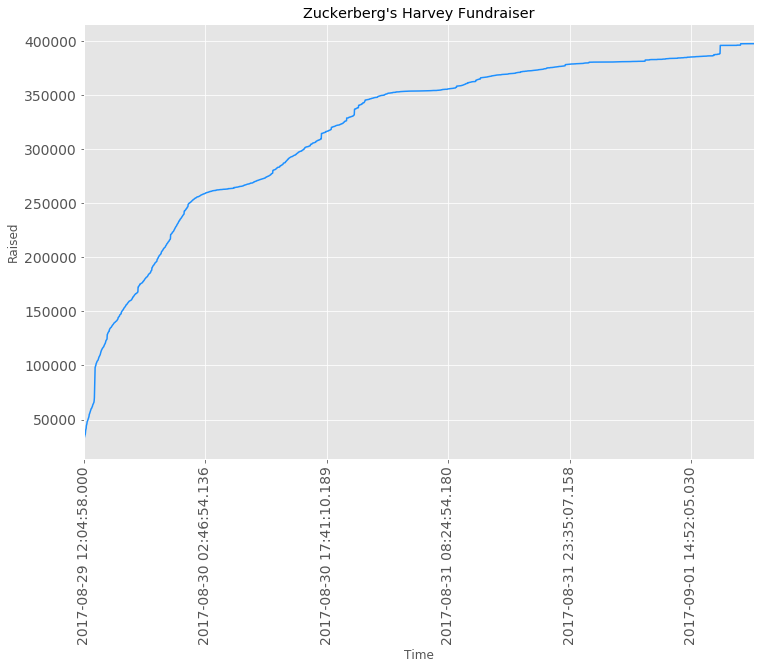

In [16]:
funds.raised.plot(figsize=(12,8), rot=90, title= "Zuckerberg's Harvey Fundraiser", fontsize=14, color='dodgerblue')
plt.xlabel("Time")
plt.ylabel("Raised")
plt.show()

In [17]:
print(funds.raised.max())
print(pd.to_datetime(funds.index[-1:]) - pd.to_datetime(funds.index[0]))

397585
TimedeltaIndex(['6 days 22:28:20.063000'], dtype='timedelta64[ns]', name=u'time', freq=None)


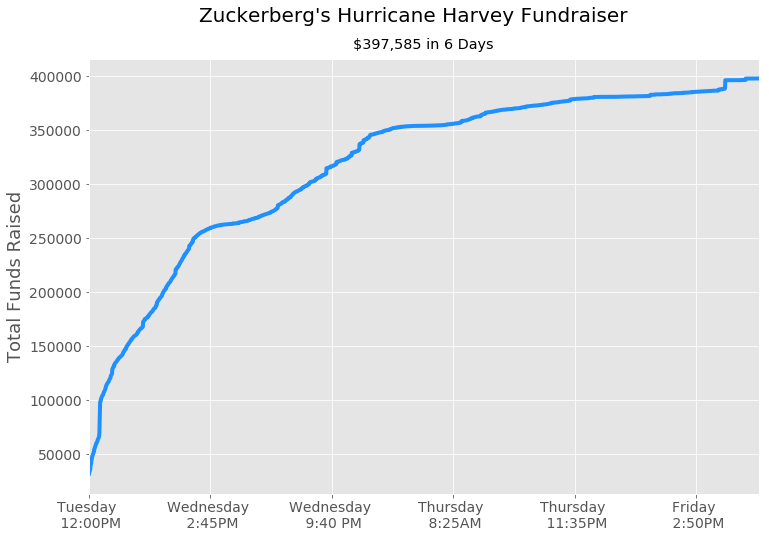

In [18]:
fig, ax = plt.subplots()
funds.raised.plot(figsize=(12,8), color='dodgerblue', fontsize=14)
plt.suptitle("Zuckerberg's Hurricane Harvey Fundraiser", size=20, y=.97)
plt.title("$397,585 in 6 Days", y=1.01)
plt.xlabel("", size=18)
plt.ylabel("Total Funds Raised", size=18)

ax.set_xticklabels(["Tuesday \n 12:00PM", "Wednesday \n 2:45PM", "Wednesday \n 9:40 PM", "Thursday \n 8:25AM", "Thursday \n 11:35PM", "Friday \n 2:50PM"],minor=False)
ax.lines[0].set_linewidth(4)

plt.savefig('./graphs/donations_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# first derivative
funds['first_difference'] = funds.raised - funds.raised.shift(1)

In [20]:
# max donation per second
(funds.first_difference[1:] / (pd.to_datetime(funds.index[1:]) - pd.to_datetime(funds.index[:2757])).seconds)

time
2017-08-29 12:06:34.000     7.729167
2017-08-29 12:07:54.000    11.987500
2017-08-29 12:09:27.000     8.311828
2017-08-29 12:10:50.000    14.879518
2017-08-29 12:12:17.000     3.390805
2017-08-29 12:13:56.000    15.606061
2017-08-29 12:15:37.000    24.752475
2017-08-29 12:17:25.000     6.814815
2017-08-29 12:18:58.000    11.612903
2017-08-29 12:20:23.000    29.176471
2017-08-29 12:22:08.000     8.857143
2017-08-29 12:23:33.000     9.070588
2017-08-29 12:25:10.000    16.608247
2017-08-29 12:26:51.000     8.415842
2017-08-29 12:28:14.000     4.228916
2017-08-29 12:29:35.000     8.160494
2017-08-29 12:31:09.000     8.531915
2017-08-29 12:32:42.000     7.526882
2017-08-29 12:34:03.000     7.901235
2017-08-29 12:35:47.557     6.451923
2017-08-29 12:37:34.027     8.698113
2017-08-29 12:39:12.167    17.102041
2017-08-29 12:40:50.951     3.673469
2017-08-29 12:42:15.593     9.285714
2017-08-29 12:44:00.552     7.788462
2017-08-29 12:45:42.038    10.128713
2017-08-29 12:47:13.644     3.879

In [21]:
# add to df
funds['donations_per_s'] = (funds.first_difference[1:] / (pd.to_datetime(funds.index[1:]) - pd.to_datetime(funds.index[:2757])).seconds)

In [22]:
print("Max funds raised per second: %d" %funds.donations_per_s.max())
print("At this time %s" %funds.donations_per_s.idxmax())

Max funds raised per second: 127
At this time 2017-08-29 13:16:19.653


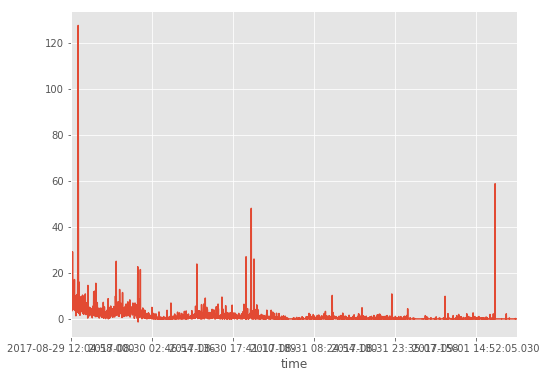

In [23]:
funds.donations_per_s.plot()

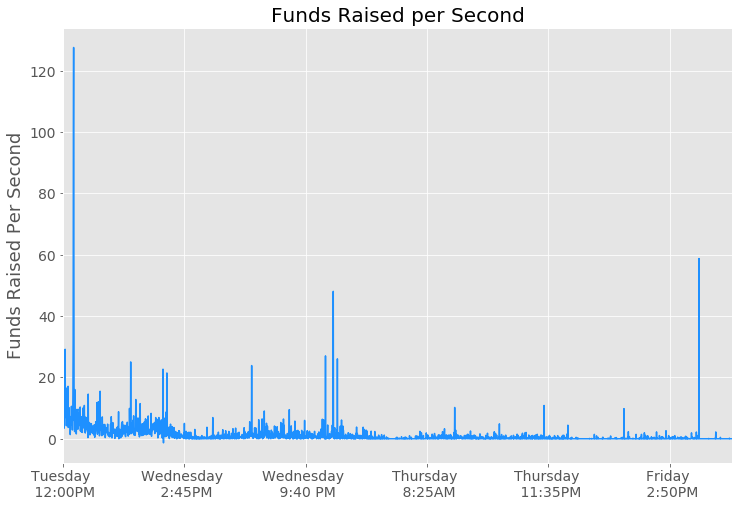

In [24]:
fig, ax = plt.subplots()
funds.donations_per_s.plot(figsize=(12,8), color='dodgerblue', fontsize=14)
plt.title("Funds Raised per Second", size=20)
plt.xlabel("", size=18)
plt.ylabel("Funds Raised Per Second", size=18)

ax.set_xticklabels(["Tuesday \n 12:00PM", "Wednesday \n 2:45PM", "Wednesday \n 9:40 PM", "Thursday \n 8:25AM", "Thursday \n 11:35PM", "Friday \n 2:50PM"],minor=False)
#ax.lines[0].set_linewidth(4)
#ax.set_ylim(-10, 20)

plt.show()


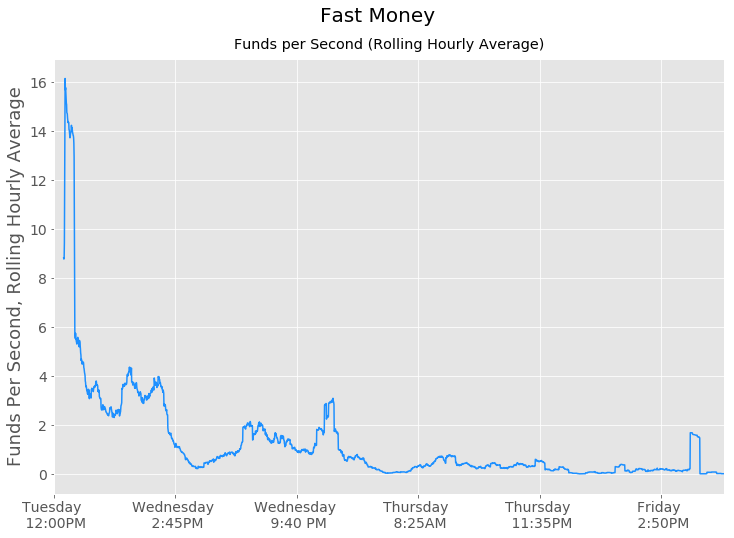

In [25]:
fig, ax = plt.subplots()
funds.donations_per_s.rolling(window=40).mean().plot(figsize=(12,8), color='dodgerblue', fontsize=14)
plt.title("Funds Raised per Second", size=20)

plt.suptitle("Fast Money", size=20, y=.97)
plt.title("Funds per Second (Rolling Hourly Average)", y=1.01)


plt.xlabel("", size=18)
plt.ylabel("Funds Per Second, Rolling Hourly Average", size=18)

ax.set_xticklabels(["Tuesday \n 12:00PM", "Wednesday \n 2:45PM", "Wednesday \n 9:40 PM", "Thursday \n 8:25AM", "Thursday \n 11:35PM", "Friday \n 2:50PM"],minor=False)

plt.savefig('./graphs/donations_per_second.png', dpi=300, bbox_inches='tight')
plt.show()


## Shares over time

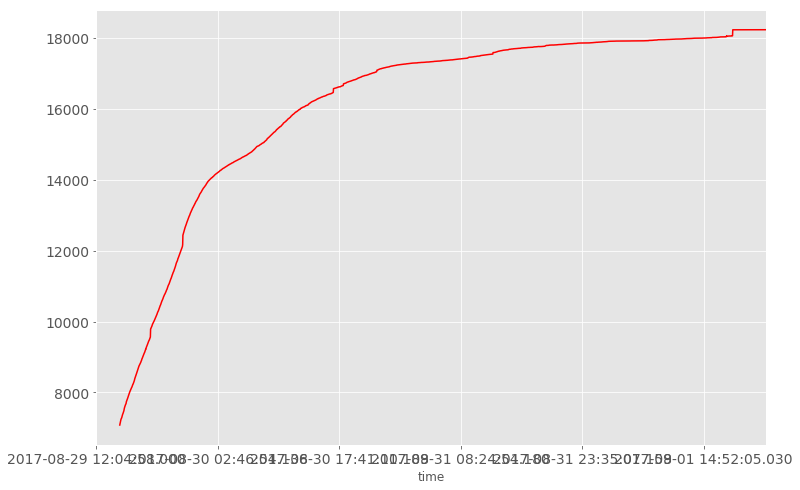

In [26]:
# shares
funds.shares.plot(figsize=(12,8), color='red', fontsize=14)

In [27]:
print(funds.shares.max())
print(pd.to_datetime(funds.index[-1:]) - pd.to_datetime(funds.index[0]))

18230.0
TimedeltaIndex(['6 days 22:28:20.063000'], dtype='timedelta64[ns]', name=u'time', freq=None)


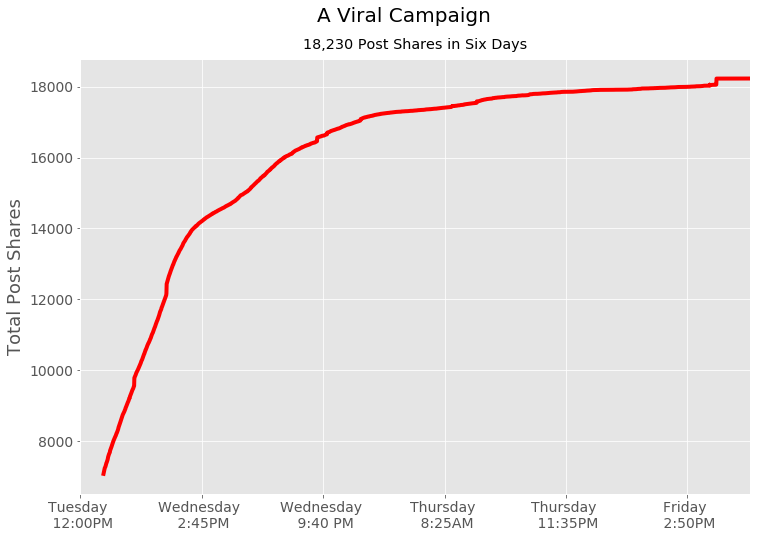

In [28]:
fig, ax = plt.subplots()
funds.shares.plot(figsize=(12,8), color='red', fontsize=14)
plt.title("Zuckerberg's Harvey Fundraiser Shares", size=20)

plt.suptitle("A Viral Campaign", size=20, y=.97)
plt.title("18,230 Post Shares in Six Days", y=1.01)


plt.xlabel("", size=18)
plt.ylabel("Total Post Shares", size=18)

ax.set_xticklabels(["Tuesday \n 12:00PM", "Wednesday \n 2:45PM", "Wednesday \n 9:40 PM", "Thursday \n 8:25AM", "Thursday \n 11:35PM", "Friday \n 2:50PM"],minor=False)
ax.lines[0].set_linewidth(4)

plt.savefig('./graphs/shares_over_time.png', dpi=300, bbox_inches='tight')
plt.show()


## Shares and amount over time (logarithmic scale)

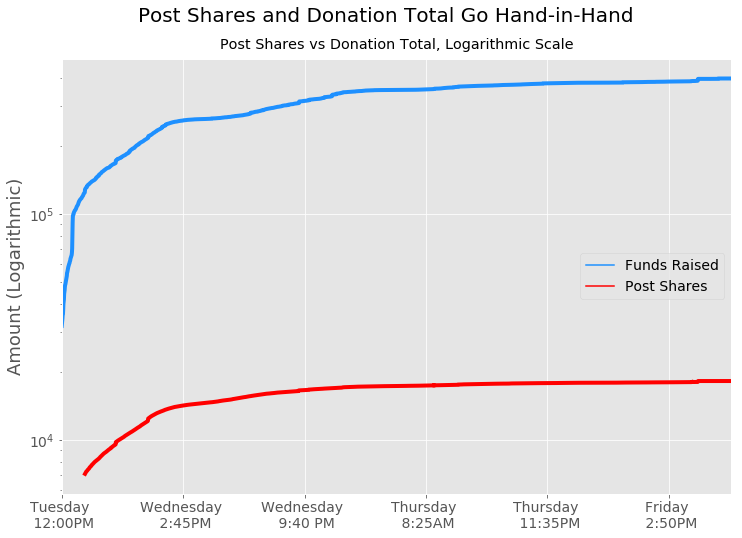

In [ ]:
# use logarithmic scale to plot on same axis
fig, ax = plt.subplots()
funds.raised.plot(figsize=(12,8), color='dodgerblue', label="Funds Raised", fontsize=14)
funds.shares.plot(figsize=(12,8), color='red', label="Post Shares",fontsize=14)

plt.suptitle("Post Shares and Donation Total Go Hand-in-Hand", size=20, y=.97)
plt.title("Post Shares vs Donation Total, Logarithmic Scale", y=1.01)

plt.xlabel("", size=18)
plt.ylabel("Amount (Logarithmic)", size=18)
plt.legend(loc=5, prop={'size': 14})


ax.set_xticklabels(["Tuesday \n 12:00PM", "Wednesday \n 2:45PM", "Wednesday \n 9:40 PM", "Thursday \n 8:25AM", "Thursday \n 11:35PM", "Friday \n 2:50PM"],minor=False)
ax.lines[0].set_linewidth(4)
ax.lines[1].set_linewidth(4)
ax.set_yscale('log')

plt.savefig('./graphs/donations_and_shares.png', dpi=300, bbox_inches='tight')

plt.show()



# Correlation between amount and shares

In [ ]:
# overall correlation
funds.corr()

In [ ]:
# calculate rolling correlation every hour
funds.raised.rolling(window=40).corr(other=funds.shares).plot()

In [ ]:
fig, ax = plt.subplots()
funds.raised.rolling(window=40).corr(other=funds.shares).plot(figsize=(12,8), fontsize=14)
plt.title("Rolling Correlation: Amount Raised and Shares", size=20)

plt.suptitle("Amount Raised and Post Shares Are Consistently Correlated", size=20, y=.97)
plt.title("Correlation coefficient (Rolling Hourly)", y=1.01)

plt.xlabel("", size=18)
plt.ylabel("Correlation Coefficient", size=18)

ax.set_xticklabels(["Tuesday \n 12:00PM", "Wednesday \n 2:45PM", "Wednesday \n 9:40 PM", "Thursday \n 8:25AM", "Thursday \n 11:35PM", "Friday \n 2:50PM"],minor=False)
ax.lines[0].set_linewidth(4)

plt.savefig('./graphs/donations_shares_correlation.png', dpi=300, bbox_inches='tight')
plt.show()


## Average amount of shares over time

In [ ]:
# "average" amount of donation per share
funds.tail(1).raised/funds.tail(1).shares

In [ ]:
(funds.raised.rolling(window=40).mean() / funds.shares.rolling(window=40).mean()).plot()

In [ ]:
fig, ax = plt.subplots()
(funds.raised.rolling(window=40).mean() / funds.shares.rolling(window=40).mean()).plot(figsize=(12,8), fontsize=14)

plt.suptitle("One Post Share + Zuckerberg's Audience is Worth $20", size=20, y=.97)
plt.title("Average Amount Donated per Total Post Shares (Rolling Hourly)", y=1.01)

plt.xlabel("", size=18)
plt.ylabel("Donation Per Post Share", size=18)

ax.set_xticklabels(["Tuesday \n 12:00PM", "Wednesday \n 2:45PM", "Wednesday \n 9:40 PM", "Thursday \n 8:25AM", "Thursday \n 11:35PM", "Friday \n 2:50PM"],minor=False)
ax.lines[0].set_linewidth(4)

plt.savefig('./graphs/donation_per_share.png', dpi=300, bbox_inches='tight')
plt.show()
